# Training a CNN classifier - End to End

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# Some imports for getting the CIFAR-10 dataset and for help with visualization*]
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical


In [2]:
# Downloading the data
!gdown 1Bsfrw9i5nlpnLEu-LOllM6KFxEw2zsR1
!unzip cifar.zip

Downloading...
From: https://drive.google.com/uc?id=1Bsfrw9i5nlpnLEu-LOllM6KFxEw2zsR1
To: /content/cifar.zip
100% 3.13M/3.13M [00:00<00:00, 145MB/s]
Archive:  cifar.zip
  inflating: cifar_ytest.npy         
  inflating: cifar_mini_X.npy        
  inflating: cifar_mini_y.npy        
  inflating: cifar_Xtest.npy         


In [4]:
# Run this cell to load a subset of the cifar10dataset
X_train = np.load('cifar_mini_X.npy')
y_train = np.load('cifar_mini_y.npy')
print(X_train.shape,y_train.shape)


(1000, 32, 32, 3) (1000, 1)


## Info on the dataset

> The original CIFAR10 dataset consists of 50,000 images in the training set & an additional 10,000 images in the test set.

Owning to the limitations of the platform, we will use *only* 1000 images for training set, and 100 images for the test set.
However, you are encouraged to retrain the model with the original training set to get an improvement on your performance.
Please find instructions to load the entire dataset [here](https://keras.io/api/datasets/cifar10/)

In [5]:
# Normalize images
X_train = X_train/255.-0.5

# Since we have 10 output labels, we specify that in 'to_categorical' function
num_classes = 10
y_train = to_categorical(y_train, num_classes)


In [6]:
y_train.shape

(1000, 10)

In [3]:
# A dictionary to turn class index into class labels for CIFAR-10
cifar10dict = {0 : 'airplane', 1 : 'automobile', 2 : 'bird', 3 : 'cat', 4 : \
               'deer', 5 : 'dog', 6 : 'frog', 7 : 'horse', 8 : 'ship', 9 : 'truck'}
               

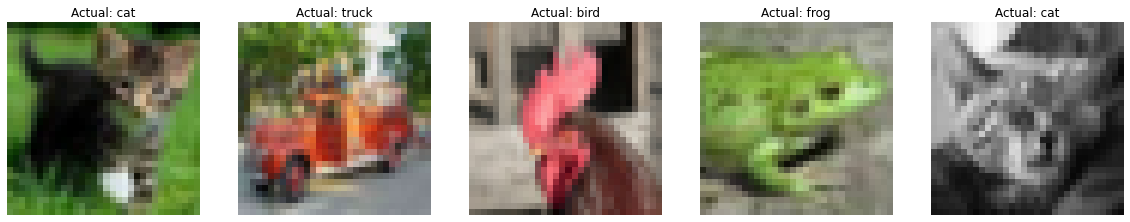

In [8]:
# Let's look at some sample images with their labels
# Run the helper code below to plot the image and its label
num_images = 5

fig, ax = plt.subplots(1,num_images,figsize=(20,10))
for i in range(num_images):
    image_index = np.random.randint(0,1000)
    img = (X_train[image_index] + 0.5)
    ax[i].imshow(img)
    label = cifar10dict[np.argmax(y_train[image_index],axis=-1)]
    ax[i].set_title(f'Actual: {label}')
    ax[i].axis('off')


## Building the CNN

In [9]:

# Build a CNN that takes the (32,32,3) images as input,
# and gives out 10 outputs that give the probability of each class
# We suggest a model architecture in the hints, but feel free
# to use your own variation

model = Sequential()
# Your code here
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D((2,2),strides=2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))
# Compile the model with loss as categorical_crossentropy
# Use Adam optimizer with learning rate 0.001 (you can change this later
# Specify the metrics as 'accuracy')
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

# View a summary of your model to see if the architecture is correct
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

## Model Training

In [10]:
# Fit the model with the training data
# Specify a batch size, and number of epochs to train
batch_size = 64
epochs = 50

# keep a validation split of 0.2 to begin with and fit the model
# your code here
callbacks = EarlyStopping(monitor='val_accuracy',restore_best_weights=True,patience=20)
history = model.fit(X_train,y_train,batch_size=batch_size,epochs=epochs,validation_split=0.2,callbacks=callbacks)


Epoch 1/50
13/13 [==============================] - 8s 612ms/step - loss: 2.2970 - accuracy: 0.1275 - val_loss: 2.2402 - val_accuracy: 0.1500
Epoch 2/50
13/13 [==============================] - 5s 337ms/step - loss: 2.0776 - accuracy: 0.2400 - val_loss: 2.1064 - val_accuracy: 0.1550
Epoch 3/50
13/13 [==============================] - 4s 281ms/step - loss: 1.8948 - accuracy: 0.3150 - val_loss: 2.0012 - val_accuracy: 0.2600
Epoch 4/50
13/13 [==============================] - 4s 335ms/step - loss: 1.7658 - accuracy: 0.3600 - val_loss: 1.9023 - val_accuracy: 0.3000
Epoch 5/50
13/13 [==============================] - 4s 285ms/step - loss: 1.5745 - accuracy: 0.4363 - val_loss: 1.9069 - val_accuracy: 0.3200
Epoch 6/50
13/13 [==============================] - 4s 283ms/step - loss: 1.4484 - accuracy: 0.4950 - val_loss: 1.9085 - val_accuracy: 0.3400
Epoch 7/50
13/13 [==============================] - 4s 284ms/step - loss: 1.2412 - accuracy: 0.5638 - val_loss: 1.9482 - val_accuracy: 0.3550
Epoch 

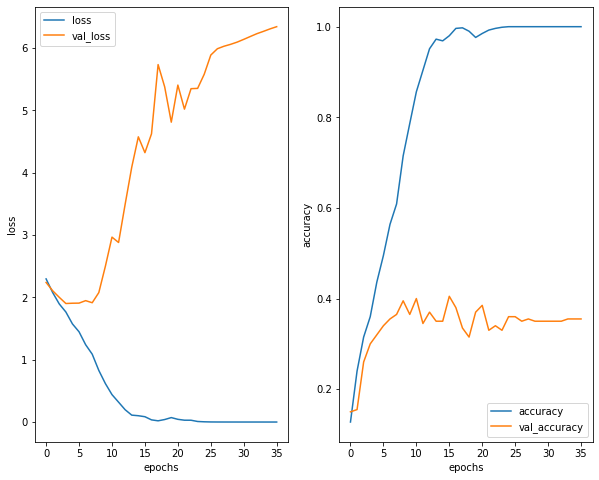

In [12]:
# Write the code to plot the following:
# - Training loss
# - Validation loss
# - Training accuracy 
# - Validation accuracy
# Your code here
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].plot(history.history['loss'],label='loss')
ax[0].plot(history.history['val_loss'],label='val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='accuracy')
ax[1].plot(history.history['val_accuracy'],label='val_accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend()



## Model evaluation

In [13]:
# Import the mini test set
x_test,y_test = np.load('cifar_Xtest.npy'),np.load('cifar_ytest.npy')


In [14]:
# Preprocess the test set 
X_test = x_test/255. - 0.5

# Convert test labels to one_hot encoding
y_test = to_categorical(y_test)


In [15]:
# Evaluate the model to get the model metric specific
model.evaluate(X_test,y_test)


4/4 [==============================] - 0s 31ms/step - loss: 4.1479 - accuracy: 0.4000


[4.147862434387207, 0.4000000059604645]

In [23]:
model.predict(X_test).shape

(100, 10)

In [22]:
model.predict(X_test).argmax(axis=1)

array([0, 7, 6, 2, 6, 7, 1, 1, 0, 6, 2, 3, 1, 6, 6, 4, 5, 8, 6, 8, 8, 9,
       4, 0, 8, 6, 7, 1, 8, 7, 8, 7, 6, 5, 5, 0, 9, 3, 2, 4, 8, 9, 7, 8,
       4, 2, 6, 6, 8, 2, 7, 1, 7, 6, 6, 7, 1, 4, 5, 1, 7, 7, 8, 0, 6, 9,
       1, 3, 9, 2, 5, 2, 1, 4, 6, 6, 1, 0, 9, 6, 6, 7, 1, 4, 4, 2, 8, 8,
       0, 6, 6, 9, 8, 7, 8, 1, 2, 9, 1, 2])

In [25]:
model.predict(X_test).argmax(axis=1)


array([0, 7, 6, 2, 6, 7, 1, 1, 0, 6, 2, 3, 1, 6, 6, 4, 5, 8, 6, 8, 8, 9,
       4, 0, 8, 6, 7, 1, 8, 7, 8, 7, 6, 5, 5, 0, 9, 3, 2, 4, 8, 9, 7, 8,
       4, 2, 6, 6, 8, 2, 7, 1, 7, 6, 6, 7, 1, 4, 5, 1, 7, 7, 8, 0, 6, 9,
       1, 3, 9, 2, 5, 2, 1, 4, 6, 6, 1, 0, 9, 6, 6, 7, 1, 4, 4, 2, 8, 8,
       0, 6, 6, 9, 8, 7, 8, 1, 2, 9, 1, 2])

In [49]:
# Get the predicted label numbers by using .argmax() function
y_pred = model.predict(X_test).argmax(axis=1)

# Use the same function to get the predicted label numbers for test set
y_labels = y_test.argmax(axis=1)


In [35]:
y_labels.shape,y_pred.shape

((100,), (100,))

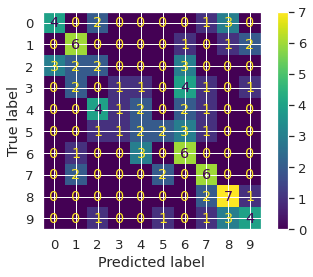

In [50]:
# Get the confusion matrix for the predictions
# Read more about the confusion matrix here
from sklearn.metrics import ConfusionMatrixDisplay
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
cf_matrix = ConfusionMatrixDisplay.from_predictions(y_labels,y_pred)
print(cf_matrix)


In [40]:
# Find below the helper code to make a nice plot of the above confusion matrix
def plot_confusion_matrix(confusion_matrix,cifar10_dictionary,ax=None):
    df_cm = pd.DataFrame(confusion_matrix, index = cifar10_dictionary.values(),
                      columns = cifar10_dictionary.values())
    sns.set(font_scale=1.2) # for label size
    ax = sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},cmap='YlOrBr')
    ax.xaxis.set_ticks_position('top')

TypeError: ignored

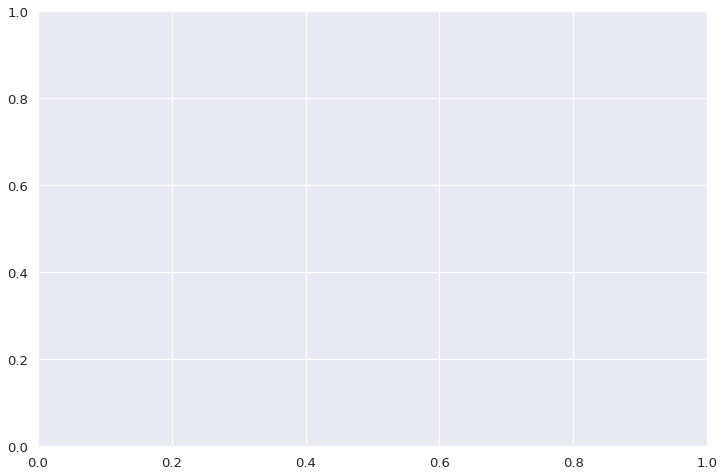

In [41]:
# Here we call the plotting function
# Observe the most misclassfied entries
# and discuss ways to improve performance
fig,ax = plt.subplots(figsize=(12,8))
plot_confusion_matrix(cf_matrix,cifar10dict,ax=ax)


## Improving model performance

As you would have noticed, your model starts to overfit on the training set.
You may employ several ways to remedy this: 
1. Get more training data (use the entire CIFAR10 training set)
2. Use Data augmentation
3. Use other regularization methods

### Add dropouts, and use the whole dataset

In [4]:
# Building the dropout model2

model2 = Sequential()
# Your code here
model2.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))
model2.add(Conv2D(32,(3,3),padding='valid',activation='relu'))
model2.add(MaxPooling2D((2,2),strides=2))
model2.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model2.add(Conv2D(64,(3,3),padding='valid',activation='relu'))
model2.add(MaxPooling2D((2,2),strides=2))
model2.add(Flatten())
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='softmax'))
# Compile the model2 with loss as categorical_crossentropy
# Use Adam optimizer with learning rate 0.001 (you can change this later
# Specify the metrics as 'accuracy')
opt = Adam(learning_rate=0.001)
model2.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

# View a summary of your model2 to see if the architecture is correct
model2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                    

In [5]:
# Load the whole dataset 
# X_train2 = np.load('/content/cifar_Xtest.npy')
# y_train2 = np.load('/content/cifar_ytest.npy')

(X_train2, y_train2), (x_test2, y_test2) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


In [6]:
X_train2.shape,y_train2.shape

((50000, 32, 32, 3), (50000, 1))

In [7]:
# Normalize data
# X_train2 = X_train2/255.-0.5
X_train2 = X_train2/255. - 0.5
y_train2 = to_categorical(y_train2,10)
# to categorical 
X_train2.shape,y_train2.shape

((50000, 32, 32, 3), (50000, 10))

In [9]:
# Fitting the model on the entire dataset
batch_size = 128
epochs = 50

# keep a validation split of 0.2 to begin with and fit the model
# your code here
callbacks = EarlyStopping(monitor='val_accuracy',restore_best_weights=True,patience=10)
history2 = model2.fit(X_train2,y_train2,batch_size=batch_size,epochs=epochs,validation_split=0.2,callbacks=callbacks)

Epoch 1/50
313/313 [==============================] - 9s 28ms/step - loss: 1.2933 - accuracy: 0.5325 - val_loss: 1.1326 - val_accuracy: 0.6022
Epoch 2/50
313/313 [==============================] - 9s 28ms/step - loss: 0.9953 - accuracy: 0.6480 - val_loss: 0.9247 - val_accuracy: 0.6790
Epoch 3/50
313/313 [==============================] - 10s 31ms/step - loss: 0.8183 - accuracy: 0.7126 - val_loss: 0.8428 - val_accuracy: 0.7065
Epoch 4/50
313/313 [==============================] - 8s 25ms/step - loss: 0.6956 - accuracy: 0.7558 - val_loss: 0.7850 - val_accuracy: 0.7301
Epoch 5/50
313/313 [==============================] - 8s 25ms/step - loss: 0.5815 - accuracy: 0.7967 - val_loss: 0.7683 - val_accuracy: 0.7402
Epoch 6/50
313/313 [==============================] - 8s 25ms/step - loss: 0.4903 - accuracy: 0.8278 - val_loss: 0.7670 - val_accuracy: 0.7511
Epoch 7/50
313/313 [==============================] - 9s 30ms/step - loss: 0.3920 - accuracy: 0.8634 - val_loss: 0.7773 - val_accuracy: 0.762

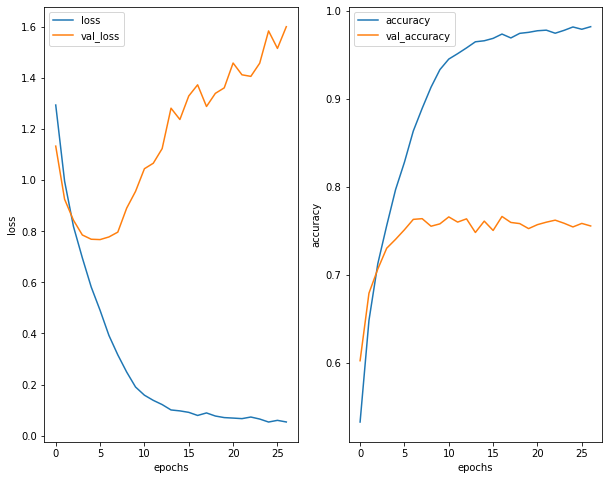

In [10]:
# Write the code to plot the following:
# - Training loss
# - Validation loss
# - Training accuracy 
# - Validation accuracy
# Your code here
fig,ax = plt.subplots(1,2,figsize=(10,8))
ax[0].plot(history2.history['loss'],label='loss')
ax[0].plot(history2.history['val_loss'],label='val_loss')
ax[0].set_xlabel('epochs')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[1].plot(history2.history['accuracy'],label='accuracy')
ax[1].plot(history2.history['val_accuracy'],label='val_accuracy')
ax[1].set_xlabel('epochs')
ax[1].set_ylabel('accuracy')
ax[1].legend()



In [14]:
x_test2 = x_test2/255. - 0.5

In [13]:
y_test2 = to_categorical(y_test2,10)

In [15]:
# Evaluate model
model2.evaluate(x_test2,y_test2)


313/313 [==============================] - 2s 7ms/step - loss: 1.4101 - accuracy: 0.7506


[1.4101078510284424, 0.7505999803543091]

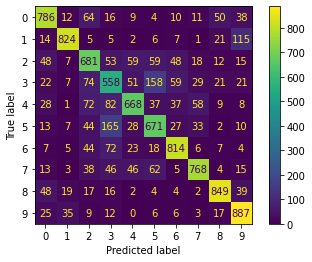

In [19]:
# Get the predicted label numbers by using .argmax() function
y_pred2 = model2.predict(x_test2).argmax(axis=1)

# Use the same function to get the predicted label numbers for test set
y_labels2 = y_test2.argmax(axis=1)

# Get the confusion matrix for the predictions
# Read more about the confusion matrix here
from sklearn.metrics import ConfusionMatrixDisplay
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
cf_matrix = ConfusionMatrixDisplay.from_predictions(y_labels2,y_pred2)
print(cf_matrix)
